# Tugas Praktikum

In [21]:
# mengimport module yang dibutuhkan

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [3]:
# mengimport data excel / csv yang akan digunakan
data = 'csv/insurance.csv'

# baca file csv menggunakan pandas
df = pd.read_csv(data)

# Panggil objek LabelEncoder
le = LabelEncoder()

# Melakukan proses encoding
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df['smoker'] = le.fit_transform(df['smoker'])

# tampilkan data lima teratas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


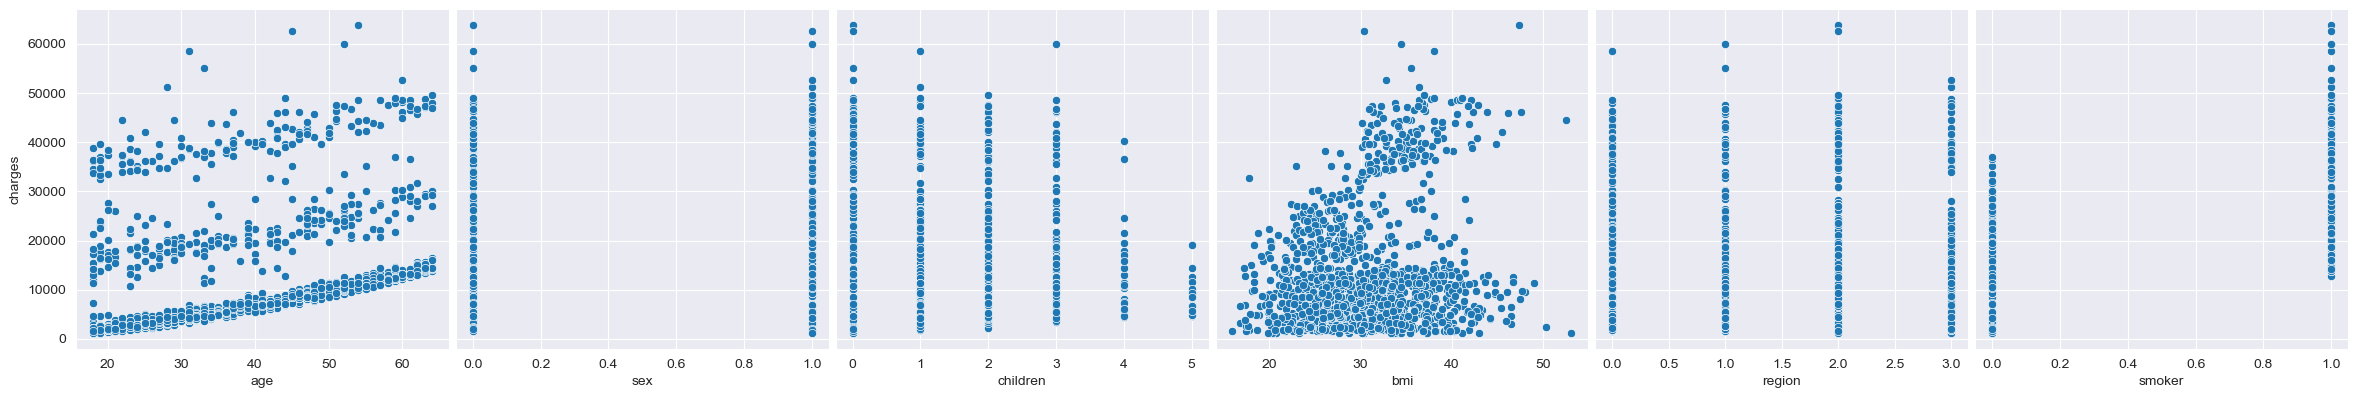

In [4]:
# visualisasi data untuk menampilkan hubungan variabel bebas dengan target
sns.pairplot(
    df,
    x_vars=[
        'age','sex','children',
        'bmi','region','smoker'
    ],
    y_vars='charges',size=4,
    aspect=1,kind='scatter'
)

plt.show()

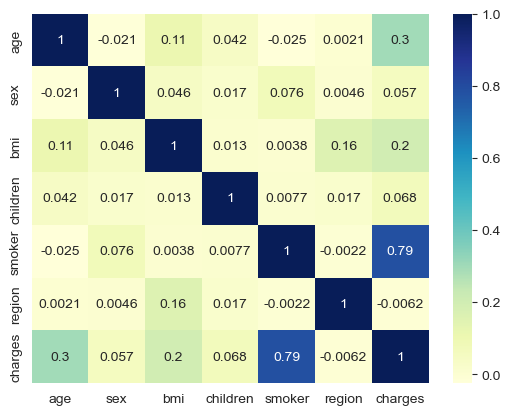

In [5]:
# menampilkan visualisai korelasi dengan heatmap
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

plt.show()

In [6]:
#  memisahkan variabel bebas dan target
x = df[['age','smoker']]
y = df['charges']

### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [12]:
# membagi dataser menjadi data latih dan uji dengan proporsi 7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)  

### 3. Lakukan feature scaling jika diperlukan.

In [13]:
X = df.iloc[:, 0:5].values
y = df.iloc[:, 6].values
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

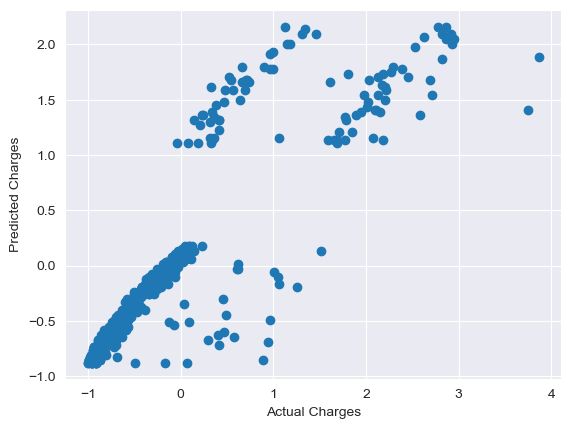

In [16]:
# membuat objek LinearRegression
mlr = LinearRegression()

# melatih model regresi linier menggunakan data latihan sebelumnya
mlr.fit(x_train, y_train)

# menampilkan visualisasi statistik data prediksi
y_pred = mlr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [22]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()
y_pred = mlr.predict(x_test)

### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [23]:
y_actual = y
y_pred = mlr.predict(x)

#mMenghitung MAE
mae = mean_absolute_error(y_actual,y_pred)

# menghitung MSE
mse = mean_squared_error(y_actual,y_pred)

# menghitung RMSE
rmse = np.sqrt(mse)

# menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.34667853718809016
MSE: 0.2788821053040878
RMSE: 0.5280928945783003
R-squared: 0.7211178946959121
